In [1]:
#import numpy for specifying arrays and pyplot as plt from matplotlib for plotting data
import numpy as np
import matplotlib.pyplot as plt
#import numpy.random as nprd to generate random functions
import numpy.random as nprd
#import the module corner that lets us visualize MCMC plots
import corner

#### Step 1.1: Ordinary least squares

In [2]:
#reads the data from a text file into a numpy array as a list of [x,y] values in list.
#Load the linear fit data from the text file using np.loadtxt function, replace 'filename.txt' with the actual filename
data = np.loadtxt('3036943_MDC1.txt')

#data[i,j] returns ith row and jth column. putting ':' in the first index returns all rows for a given column. 
#it is equivalent to 0:len(data) (all indices from 0 to len(data) in steps of 1) for the first index
#x data is a list of all the first column values
#y data is a list of all the second column values
x = data[:,0]
y = data[:,1]

#store the number of data points in n
n=len(x)


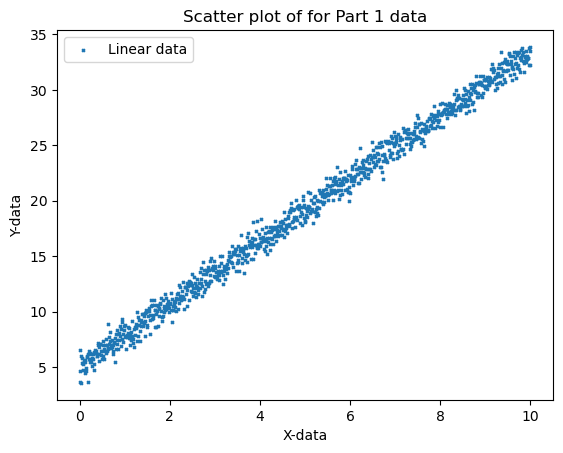

In [3]:
#Plot to visualize the the given data
#the scatter plot plots markers on (x,y) with x and y values from the data as a 'x' on the graph with size s= 4
plt.scatter(x,y,marker='x',label='Linear data',s=4)
plt.xlabel('X-data') #specifies x-label
plt.ylabel('Y-data') #specifies y-label
plt.title('Scatter plot of for Part 1 data') #specifies title
plt.legend() #generates the legend from given labels
plt.show() #generates plot

The parameters $a$ and $b$ are given in Ordinary Least square satisfy: $y_i = a + bx_i + \epsilon_i$, and $a$ and $b$ are given as, $$a = \frac{\sum y_i \sum x_i^2 - \sum x_i y_i\sum x_i}{n \sum x_i^2 - (\sum x_i)^2}$$ and, $$b=\frac{n \sum x_i y_i -  \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}$$

In [4]:
#To use the formulae for linear regression, we need to calculate the following sums;
sum_x = sum(x) #stores sum of x values from data. sum(x) sums all elements in x array
sum_y = sum(y) #stores sum of y values from data. sum(y) sums all elements in y array
sum_x2 = 0 #will store sum of x squared values from data
sum_xy = 0 #will store sum of x[i]y[i] values from piecewise multiplication of x and y data

In [5]:
#we use a for loop to get sums of x squared values and xy values piecewise multiplied. 
#the loop runs through the indices i from i=0 to i=n in steps of 1, spanning the data given
for i in range(0,n,1):
    sum_x2 = sum_x2 + x[i]**2 #adds x^2 values from list iteratively to sum_x2
    sum_xy = sum_xy + x[i]*y[i] #adds x*y (piecewise multiplied) values from list iteratively to sum_xy

In [6]:
# We use the definitions of parameter a and b from literature and the various sums to calculate a and b

a = (sum_y*sum_x2 - sum_xy*sum_x)/(n*sum_x2-(sum_x)**2) #calculating parameter a
b = (n*sum_xy - sum_x*sum_y)/(n*sum_x2-(sum_x)**2) #calculating parameter b

In [7]:
#prints the intercept (a) and slope (b). the round(f,n) rounds off the f-value to n decimal places. Here we round to 5 decimal places
print("The estimated intercept is a =",round(a,5),"and the slope is b =",round(b,5)) 

The estimated intercept is a = 5.06359 and the slope is b = 2.83316


In [8]:
#Now we calculate the variance and the covariance of the data from the residuals of the data from the residuals
#make an empty array that will store residual values e[i]=y[i]-(a+b*x[i])
res=0
sum_res_sq=0
for i in range(0,n,1):
    res = y[i] - (a+ (b*x[i]))
    sum_res_sq = sum_res_sq + res**2 #adds the squared residual value each iteration

#we divide the sum of residual squares by n-2 to estimate variance(2 dof for 2 parameters used)
sig_sq_1 = sum_res_sq/(n-2)

$$\text{var}(a) = \frac{\sigma^2 \sum x_i^2}{n \sum x_i^2 - (\sum x_i)^2}$$
$$\text{var}(b)= \frac{\sigma^2 n}{n \sum x_i^2 - (\sum x_i)^2}$$
$$\text{cov}(a,b) = \frac{-\sigma^2 \sum x_i}{n \sum x_i^2 - (\sum x_i)^2}$$

In [9]:
#calculates variance of paramater a from definition
var_a = ((sig_sq_1)*sum_x2)/(n*sum_x2-(sum_x)**2) 
#calculates variance of paramater b from definition
var_b = ((sig_sq_1)*n)/(n*sum_x2-(sum_x)**2) 
#calculates covariance of paramater a and b
cov_ab = (-(sig_sq_1)*sum_x)/(n*sum_x2-(sum_x)**2) 

err_a = np.sqrt(var_a) #calculates standard deviation of a
err_b = np.sqrt(var_b) #calculates standard deviation of b


In [10]:
#prints the variances of a and b. the round(f,n) rounds off the f-value to n decimal places.
print("The variance of a is Var(a)=",round(var_a,6),"and the variance of b is Var(b)=",round(var_b,6)) 

The variance of a is Var(a)= 0.001962 and the variance of b is Var(b)= 5.9e-05


In [11]:
#prints the variances of a and b. the round(f,n) rounds off the f-value to n decimal places.
print("The covariance between a and b is Cov(a,b)=",round(cov_ab,6)) 

The covariance between a and b is Cov(a,b)= -0.000294


In [12]:
#prints the variances of a and b. the round(f,n) rounds off the f-value to n decimal places.
print("The variance of the data is", round(sig_sq_1,5)) 

The variance of the data is 0.49126


In [13]:
#prints the variances of a and b. the round(f,n) rounds off the f-value to n decimal places.
print("The std deviation of a is",round(err_a,6),"and the std deviation of b is",round(err_b,6)) 

The std deviation of a is 0.044296 and the std deviation of b is 0.00767


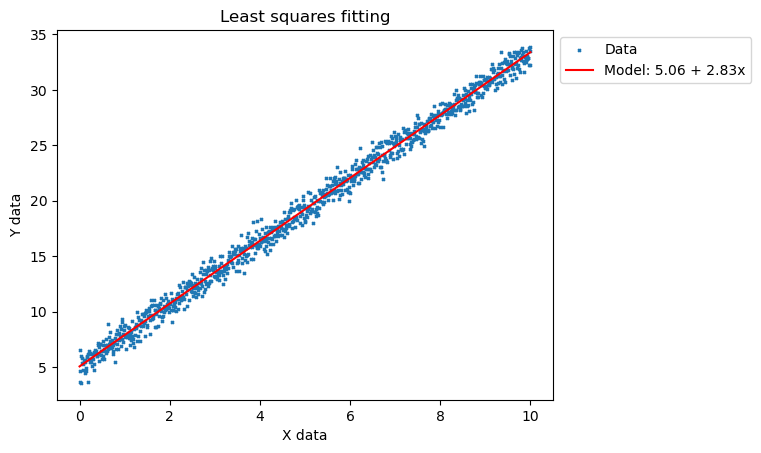

In [14]:
#creates a list of the model generated y-values using list comprehension for plotting the data
y_data_2 = [a + b * x[i] for i in range(0,n,1)]
#we use pyplot from matplotlib to plot and define the axes, labels and legend for the graph

#plt.plot plots x_data against y_data as a scatter plot with 'x' and the size of plot points s=4 and the linear fitted model given as a red coloured straight line
plt.scatter(x, y,marker='x',label='Data',s=4) 
plt.plot(x, y_data_2,label=f'Model: {round(a,2)} + {round(b,2)}x',color='red') 
#plots the model generated y-values against x values with a label showing the equation of the line with a and b rounded to 2 decimal places

plt.title("Least squares fitting") #defines the title of the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) #places a legend with given label values by default
plt.xlabel('X data')
plt.ylabel('Y data')
#in the above lines we have labelled the axis and given a title to the graph
# plt.savefig("Graph2.jpg")
#this saves the graph into a file named Graph1.jpg in the working directory
plt.show()
#shows the various parameters as set using plt(pyplot)

### Step 1.2: Max Likelihood

Since the noise is assumed Gaussian we can adopt a Gaussian likelihood for residuals
$$L = \prod_i^n \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(y_i - a - b x_i)^2}{2 \sigma^2}\right) $$

$$ l = \ln(L) = -\frac{n}{2} \ln(2\pi) - n \ln{\sigma} - \frac{1}{2\sigma^2}\sum (y_i - a - b x_i)^2$$

$$ \chi^2 = \frac{1}{\sigma^2}\sum (y_i - a - b x_i)^2$$

In [15]:
#For the same data we now fit a linear model using a maximum log likelihood estimate 

#define num as the number of standard deviations + and - from the mean for the range of values
num = 7


#choose a uniform prior for the parameters a and b. although we can use a normal distribution, from our calculation in step1.1
#we choose a uniform prior to verify our findings of parameter 'a' and 'b' from the OLS method, without any bias to begin with.
#the range of the grid of a and b is decided by the standard deviation and we assume equal probability in the range

#take the calculated values a and b and set limits as +/- 7 standard deviations covering 100% confidence intervals.
#np.linspace(amin,amax,n) generates a list of n equally spaced values between amin and amax
a_vals = np.linspace(a-(num*err_a),a+(num*err_a),100)
b_vals = np.linspace(b-(num*err_b),b+(num*err_b),100)

#here a and b are the values calculated from OLS

#we define uniform prior for the parameters a and b
#if the parameter is within the range of par_min and par_max, we return 0 (likelihood of 1)
#this is because the uniform prior is constant in the range of par_min and par_max
#otherwise we return -inf (negative infinity log likelihood implies zero likelihood outside the range)
def UNprior(par,par_min,par_max):
    if par_min <= par <= par_max:
        return 0
    else:
        return -np.inf
    
#although simply defining the grid values of a and b and calculating within that is sufficient for uniform priors
#we define a grid of +/- 7 sigmas for a and b but will enforce the prior to be uniform within +/- 5 sigmas
#this is done to use the UNprior later for c in the code and get some familiarity with behavior of the prior

In [16]:
#---------------(a)------------
#define log likelihood for the x-y data for a given value of a,b and residual noise

def log_likelihood(x,y,a,b,sig_sq):
    #define cons to be the constant term in the log likelihood function
    cons = -((n/2)*np.log(2*np.pi)) - (n*np.log(np.sqrt(sig_sq)))
    #initialize l to 0
    l = 0
    #iterate the loop through the data points k from 0 to n in steps of 1
    #we calculate the residual square divided by 2 times sigma square for each data point k of x and y and add to chis in each iteration
    for k in range(0,n,1):
        ymodel = a + (b*x[k])
        res = y[k] - ymodel
        #add the residual square divided by 2 times sigma square to l
        l = l + (-(res)**2) / (2*sig_sq)
    #define log likelihood as the sum of constant term and summation term
    l = l + cons
    return l

In [17]:
#define l1 to store the log likelihood values for each combination of a,b grid of values
#we initialise an empty array of size of the grid to store the log likelihood values
l1 = np.zeros((len(a_vals),len(b_vals)))
#we use a for loop to iterate through the grid of values for a and b and store the log likelihood values in l1 array
for i in range(0,len(a_vals),1):
        for j in range(0,len(b_vals),1):
                l1[i,j] = log_likelihood(x,y,a_vals[i],b_vals[j],sig_sq_1) + UNprior(a_vals[i],a-(5*err_a),a+(5*err_a)) + UNprior(b_vals[j],b-(5*err_b),b+(5*err_b))


#we add the prior to the log likelihood values at each grid point 
#the prior is a uniform distribution (equal probability) for a and b in the range of a and b +/- 5 standard deviations
#l1[i,j] returns the log likelihood value for the ith row and jth column of the grid(ith value of a and jth value of b)


$$ \text{pdf(z)} = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left(\frac{z - z_{mean}}{\sigma}\right)^2 $$

In [18]:
#defining the chi square function to calculate the chi square value for a given value of a,b and residual noise from the xy data
def chi_sq(x,y,a,b,sig_sq):
    #initialise chis to 0
    chis = 0
    #iterate the loop through the data points k from 0 to n in steps of 1
    #we calculate the residual square divided by sigma square for each data point k of x and y and add to chis in each iteration
    for k in range(0,n,1):
        ymodel = a + (b*x[k])
        res = y[k] - ymodel
        #add the residual square divided by sigma square to chis
        chis = chis + (res**2)/(sig_sq)
    return chis

In [19]:
#define chi1 to store the chi square values for each combination of a,b grid of values
#we initialise an empty array of size of the grid to store the chi square values
chi1 = np.zeros((len(a_vals),len(b_vals)))
#we use a for loop to iterate through the grid of values for a and b and store the log likelihood values in chi1 array
for i in range(0,len(a_vals),1):
        for j in range(0,len(b_vals),1):
                chi1[i,j] = chi_sq(x,y,a_vals[i],b_vals[j],sig_sq_1) - UNprior(a_vals[i],a-(5*err_a),a+(5*err_a)) - UNprior(b_vals[j],b-(5*err_b),b+(5*err_b))

#for chi we subtract the prior which is a uniform distribution for a and b in the range of 
#chi1[i,j] returns the chi square value for the ith row and jth column of the grid(ith value of a and jth value of b)
#again we define the prior to be uniform within +/- 5 sigmas (other values are forced to be +inf) and wont be minimizing chisquare

In [20]:
#find the minimum chi square value from the chi1 array using np.min function
min_chi = np.min(chi1)

#-----------(b)-------------
#subtract the minimum chi square value from each element of chi1 to get the grid of delta chi square values
delta_chi1 = chi1 - min_chi

In [21]:
#-------------(e)-------------------
#define a0 and b0 to store the values of a and b for the minimum chi square value
a0=0
b0=0
#we define empty arrays a1,b1,a2,b2,a3,b3 to store the values of a and b for the three confidence intervals (66.7%, 95.4% and 99.7%)
a1=[]
b1=[]
a2=[]
b2=[]
a3=[]
b3=[]
#we use a for loop to iterate through the grid of values for a and b and store the values in the empty arrays
for i in range(0,len(a_vals),1):
        for j in range(0,len(b_vals),1):
            if (delta_chi1[i,j]) == 0:
                  a0 = a_vals[i]
                  b0 = b_vals[j]
            #if the delta chi square value for given a and b from grid is less than 2.3 append the value of a and b to array a1 and b1
            if (delta_chi1[i,j]) <= 2.30:
                  a1.append(a_vals[i])
                  b1.append(b_vals[j])
            #if the delta chi square value for given a and b from grid is less than 6.17 append the value of a and b to array a2 and b2
            if (delta_chi1[i,j]) <= 6.17:
                  a2.append(a_vals[i])
                  b2.append(b_vals[j])
            #if the delta chi square value for given a and b from grid is less than 11.8 append the value of a and b to array a3 and b3
            if (delta_chi1[i,j]) <= 11.8:
                  a3.append(a_vals[i])
                  b3.append(b_vals[j])

                


In [22]:
#-------PRINTING RESULTS
#while using f(format string) with print we can specify variables within {}

print(f"Spacing for a is {14*num*err_a/100}")
print(f"Spacing for b is {14*num*err_b/100}")


#print the minimum chi square value
print(f"chi_min={min_chi}")
#print the a,b value corresponding to minimum chi square
print(f"a0={a0},b0={b0}")

#print the range for a and b as (amin,amax) and (bmin,bmax)
print(f"{(np.min(a1),np.max(a1))} and {(np.min(b1),np.max(b1))} are the a and branges for confidence 68.3%")

#print the range for a and b as (amin,amax) and (bmin,bmax)
print(f"{(np.min(a2),np.max(a2))} and {(np.min(b2),np.max(b2))} are the a and b ranges for confidence 95.4%")

#print the range for a and b as (amin,amax) and (bmin,bmax)
print(f"{(np.min(a3),np.max(a3))} and {(np.min(b3),np.max(b3))} are the a and b ranges for confidence 99.7%")


Spacing for a is 0.04340979107224862
Spacing for b is 0.007516917279707615
chi_min=998.0053590586541
a0=5.066718549022523,b0=2.832614447982996
(4.997814118749113, 5.129358940180169) and (2.8217675255014556, 2.844546062712691) are the a and branges for confidence 68.3%
(4.953965844938761, 5.173207213990521) and (2.814174679764377, 2.8521389084497693) are the a and b ranges for confidence 95.4%
(4.916381610244173, 5.210791448685109) and (2.8076665262754528, 2.8586470619386937) are the a and b ranges for confidence 99.7%


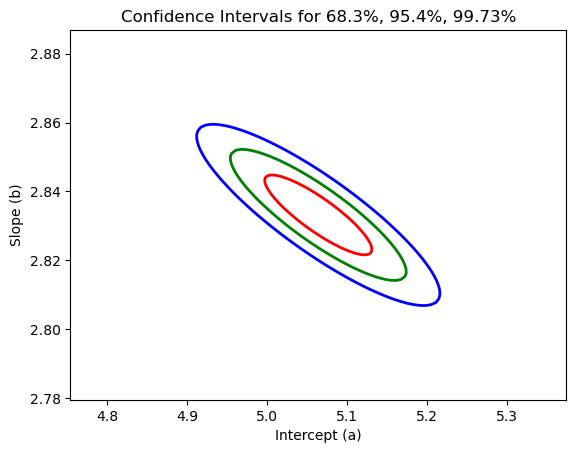

In [24]:
#--------------------(d)---------------

#plot the contours for the confidence intervals

#define the levels for the contours (contour is drawn for delta chi square values of 2.3, 6.17 and 11.8
lvls = [2.30,6.17,11.8]

# Add contours for 68.3%, 95.4%, 99.73% confidence intervals
#plt.contour takess the grid of values for a and b and the delta chi square values, 3 levels and 3 colors for the contours as given

plt.contour(a_vals, b_vals, delta_chi1 , levels=lvls, colors=['r','g','b'], linewidths=2)

#plt.contour takess the grid of values for a and b and the delta chi square values, 3 levels and 3 colors for the contours as given
# Labels and title
plt.xlabel('Intercept (a)')
plt.ylabel('Slope (b)')
plt.title('Confidence Intervals for 68.3%, 95.4%, 99.73%')


plt.show()

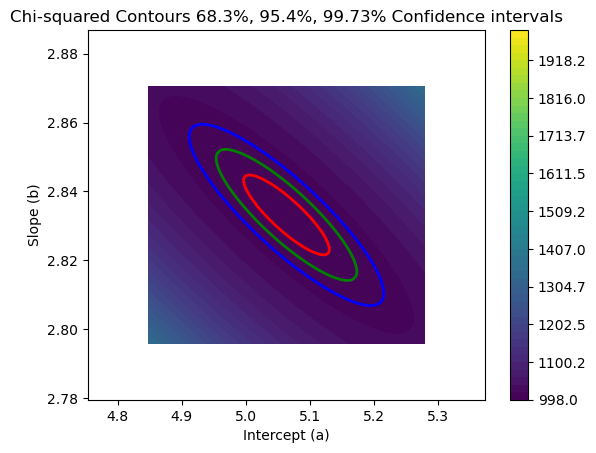

In [25]:
#------ADDITIONAL PLOTS FOR LIKELIHOOD AND CHISQ----
#define the levels for the contours (contour is drawn for chi square values for delta chi sq being 2.3, 6.17 and 11.8)
#to get chi square values we add the minimum chi square value to the delta chi square values (from definition)
chi_lvls = [min_chi + 2.30, min_chi + 6.17, min_chi + 11.8]

# Add contours for 68.3%, 95.4%, 99.73% confidence intervals
#plt.contour takess the grid of values for a and b and the grid of chi square values, 3 levels and 3 colors for the contours as given

plt.contour(a_vals, b_vals, chi1, levels=chi_lvls, colors=['r','g','b'], linewidths=2)


# Plot the chisquare values using a colormap and defining 50 levels between the minimum chi square value and 2000 
# (since max is infinity) we define 2000 as the max value for the color map)
#plt.contourf takes the grid of values for a and b and the grid of chi square values, levels as linspace and cmap as viridis
#np.linspace(amin,amax,n) generates a list of n equally spaced values between amin and amax

plt.contourf(a_vals, b_vals, chi1, levels=np.linspace(np.min(chi1), 2000, 50), cmap='viridis')
plt.colorbar() #plots the color bar for the contour plot


# Labels and title
plt.xlabel('Intercept (a)')
plt.ylabel('Slope (b)')
plt.title('Chi-squared Contours 68.3%, 95.4%, 99.73% Confidence intervals')


plt.show()

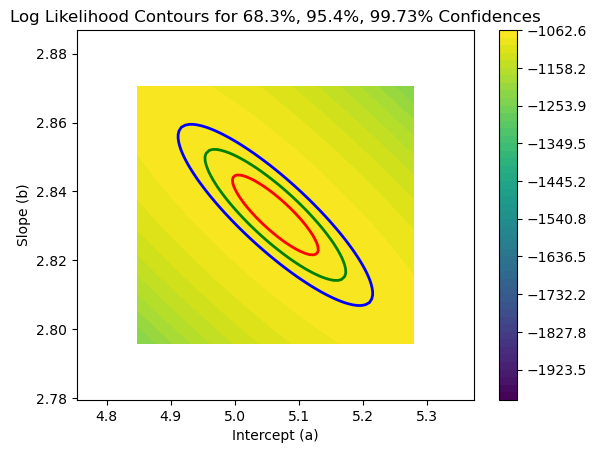

In [26]:
#calculate and store the maximum likelihood value from the l1 grid of values for a,b parameter space
max_l1 = np.max(l1)

#define the levels for the contours (contour is drawn for log-likelihood values for delta chi sq being 2.3, 6.17 and 11.8)
#to get likelihood values we add the max log_likelihood value to 0.5 times the delta chi square values (from definition)
#we write in reverse order as contour levels must be in increasing order
l1_lvls = [max_l1 - (0.5*11.8), max_l1 - (0.5*6.17), max_l1 - (0.5*2.3)]

# Add contours for 68.3%, 95.4%, 99.73% confidence intervals
#plt.contour takess the grid of values for a and b and the grid of chi square values, 3 levels and 3 colors for the contours as given

plt.contour(a_vals, b_vals, l1, levels=l1_lvls, colors=['b','g','r'], linewidths=2)

# Plot the chisquare values using a colormap and defining 50 levels between the -2000 and max_l1 
# (since min is -infinity) we define -2000 as the min value for the color map)
#plt.contourf takes the grid of values for a and b and the grid of likelihood values, levels as linspace and cmap as viridis
#np.linspace(amin,amax,n) generates a list of n equally spaced values between amin and amax

plt.contourf(a_vals, b_vals, l1, levels=np.linspace(-2000, max_l1, 50), cmap='viridis')
plt.colorbar() #plots the color bar for the contour plot

# Labels and title
plt.xlabel('Intercept (a)')
plt.ylabel('Slope (b)')
plt.title('Log Likelihood Contours for 68.3%, 95.4%, 99.73% Confidences')

plt.show()

### Step1.3 : Metropolis algorithm

In [38]:
#define log likelihood for the x-y data for a given value of a,b and residual noise

def log_likelihood(x,y,a,b,sig_sq):
    #define cons to be the constant term in the log likelihood function
    cons = -((n/2)*np.log(2*np.pi)) - (n*np.log(np.sqrt(sig_sq)))
    #initialize l to 0
    l = 0
    #iterate the loop through the data points k from 0 to n in steps of 1
    #we calculate the residual square divided by 2 times sigma square for each data point k of x and y and add to chis in each iteration
    for k in range(0,n,1):
        ymodel = a + (b*x[k])
        res = y[k] - ymodel
        #add the residual square divided by 2 times sigma square to l
        l = l + (-(res)**2) / (2*sig_sq)
    #define log likelihood as the sum of constant term and summation term
    l = l + cons
    return l

Acceptance rate: 0.81085
[[4.84524002 2.79426283]
 [4.86119284 2.79515465]
 [4.86119284 2.79515465]
 ...
 [5.00580369 2.84011975]
 [5.00346885 2.8399442 ]
 [5.0074859  2.8398179 ]]


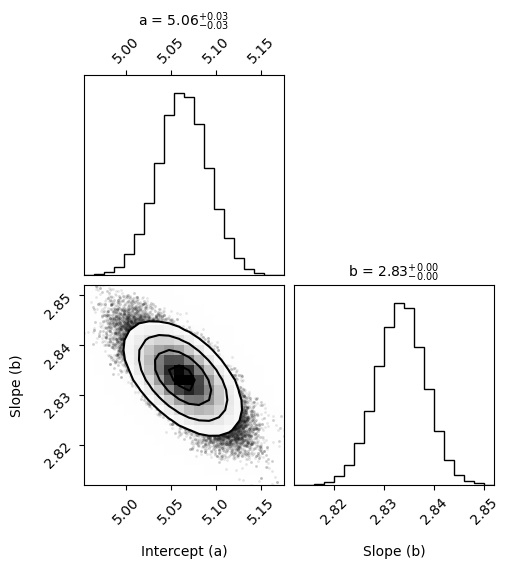

In [39]:
#-------MCMC Setup------
# Define the GAprior function
#this function calculates the log GAprior (gaussian pdf) for a given parameter value (par), parameter mean(par0) and parameter variance (sig_par
#this is the log GAprior for a normal distribution with mean par0 and variance sig_par as used previously and in lecture
def GAprior(par,par0,sig_par):
    log_prior = -0.5*np.log(2*np.pi) - (np.log(np.sqrt(sig_par))) -0.5*((par-par0)**2)/(sig_par)
    return log_prior

#we define uniform prior for the parameter c
#if the parameter is within the range of par_min and par_max, we return 0 (likelihood of 1)
#this is because the uniform prior is constant in the range of par_min and par_max
#otherwise we return -inf (negative infinity log likelihood implies zero likelihood outside the range)
def UNprior(par,par_min,par_max):
    if par_min <= par <= par_max:
        return 0
    else:
        return -np.inf
    
#we select a gaussian prior for the parameters a and b centered around a0,b0 (updated knowledge) with variance var_a and var_b
#since we did not get variance from the likelihood step we use the OLS variance but updated our knowledge of prior

#number of steps for the metropolis algorithm
nmcmc = 100000
#2d array to initialise first a,b and store sampled a,b values as first and second colum in each step (each row) for the corner plot
#rows = no. of mc chains and columns = no. of parameters
samples = np.zeros((nmcmc,2))
#define arrays with zeroes of size nmcmc to store the values likelihood for each step
logL_mc = np.zeros(nmcmc)
accept=0

#initiating starting values for a and b as 5 sigmas away from the min chi square values we obtained (a0,b0)
#the first column of samples (samples[:,0]) stores the values of a and the second column (samples[:,1]) stores the values of b
#store it in first row of samples for each column as a and b
#these values can be taken at random and they will still converge as we have defined normal priors
#+/- 5 sigma captures the random walk of the MCMC as well as the convergence both really well
samples[0,0] = a0-5*err_a
samples[0,1] = b0-5*err_b

#calculating the log likelihood for the first step using the log_likelihood function defined earlier
#since the posterior is proportional to the likelihood times the GAprior, in log we add the log_priors of two parameters to the log likelihood
#GAprior(a_mcmc[0],a0,var_a) calculates the log of probability of parameter value a_mcmc[0] given the mean a0 and variance var_a
#GAprior(b_mcmc[0],b0,var_b) calculates the log of probability of parameter value b_mcmc[0] given the mean b0 and variance var_b
logL_mc[0] = log_likelihood(x,y,samples[0,0],samples[0,1],sig_sq_1) + GAprior(samples[0,0],a0,var_a) + GAprior(samples[0,1],b0,var_b)


#step sizes for a and b (these were fixed as being in the same order as the standard deviations of a and b and after some trials)
step_a = 0.01 #step size for a
step_b = 0.001 #step size for b

#---------------RUN THE METROPOLIS ALGORITHM----
#ensure previous variables are initialised correctly like accept and samples and logL_mc with zeros
#iterate through the number of steps for the metropolis algorithm starting from 1 (as 0 is already initialised)
for i in range(1,nmcmc,1):
    #print the current step number
    print(f"Point {str(i+1)} of {str(nmcmc)}", end="\r")

    #generate a trial value for a by adding the step times a random normal value to the previous value
    ##nprd.randn() generates a random value from the normal distribution with mean 0 and standard deviation 1
    #we get a positive/negative change of a,b values that are mostly smaller than step size of a
    #this means for each value of a,b we are proposing the next value to be from normal distribution centered at previous value and variance of step size
    a_trial = samples[i-1,0] + step_a*nprd.randn() 
    b_trial = samples[i-1,1] + step_b*nprd.randn()

    #calculate the log likelihood for the trial values of a and b
    #here we add the log of prior again at the trial values of a and b
    #if the trial value is far away then prior will be very small and the log of prior will be very negative, leading to values that are mostly rejected
    #if the trial value is close to the mean then prior will be large and the log of prior will be less negative, leading to values that are mostly accepted
    #this means the prior is acting as a penalty for values that are far away from the mean

    logL_trial = log_likelihood(x,y,a_trial,b_trial,sig_sq_1) + GAprior(a_trial,a0,var_a) + GAprior(b_trial,b0,var_b)

    #GAprior(a_trial,a0,var_a) calculates the log of probability of trial value given the mean a0 and variance var_a.
    #GAprior(b_trial,b0,var_b) calculates the log of probability of trial value given the mean b0 and variance var_b.

    #calculate the log(likelihood ratio) as the difference between log likelihood of trial and previous values
    logL_ratio = logL_trial - logL_mc[i-1] 
    #if the log likelihood ratio is greater than 0 (posterior of given trial is greater than previous values)
    #then we accept the trial values
    if logL_ratio >= 0:
        #update columns in samples array with accepted a and b trial values
        #store the trial values in samples as the ith row
        samples[i,0] = a_trial
        samples[i,1] = b_trial
        #store the log likelihood for the trial values in the ith row
        logL_mc[i] = logL_trial
        accept = accept + 1 #increment the acceptance count (to signify the trial values were accepted)
    else:
        #generate a random number from uniform distribution between 0 and 1 using nprd.rand() and store it in test
        #this is used to compare with the likelihood ratio to accept or reject the trial values
        test = nprd.rand()
        #if the log likelihood ratio is less than 0 (posterior of given trial is lesser than previous values)
        #then we accept the trial values using the metropolis algorithm and compare likelihood ratio with a random number
        #if the likelihood ratio is bigger than the random number, we accept the trial values
        if test < np.exp(logL_ratio):
            #update columns in samples array with accepted a and b trial values
            #store the trial values in samples as the ith row
            samples[i,0] = a_trial
            samples[i,1] = b_trial
            #store the log likelihood for the trial values in the ith row
            logL_mc[i] = logL_trial
            accept = accept + 1 #increment the acceptance count
        #if the likelihood ratio is less than the random number, we reject the trial values    
        else:
            #if the trial values are not accepted, keep the previous values (stored in i-1 of samples array)
            #store the previous values in samples ith row
            samples[i,0] = samples[i-1,0]
            samples[i,1] = samples[i-1,1]
            #store the log likelihood for the previous values in the ith row
            logL_mc[i] = logL_mc[i-1]
            #no increment of acceptance count as the trial values were rejected


#mention the burn-in period that we want to discard (steps it takes to reach the meaningful values)
burn_in = 5000
#discard the first 5000 samples as burn-in
samples_burnt = samples[burn_in:] #discard the first 5000 samples

acceptance_rate = accept/nmcmc #calculate the acceptance rate
print("Acceptance rate:",acceptance_rate) #print the acceptance rate
print(samples)
# Plot the MCMC samples using corner plot
#the corner module uses matplotlib to plot the samples in a 2D histogram based on their counts
#the corner.corner takes the samples, labels for the axes as intercept and slope
#the show_titles=True shows the titles for each plot and the title_kwargs specifies the font size for the titles
#smooth=1.5 smooths the histogram
figure = corner.corner(samples_burnt,labels=['Intercept (a)', 'Slope (b)'],titles=['a','b'], show_titles=True, title_kwargs={"fontsize": 10},smooth=1.5,top_ticks=True)




In [40]:
#--------------(c)----------------
#find the mean and standard deviation of a,b values generated using MCMC
#np.mean(arr) returns the mean of values in the array
#np.std(arr) returns the standard deviation of values in the array
#np.cov(arr1,arr2) returns the covariance matrix of the values of arr1 and arr2
#the diagonal terms are the corresponding variances and the off-diagonal terms are the covariances
a_mcmc_mean = np.mean(samples[:,0]) #mean of a values
b_mcmc_mean = np.mean(samples[:,1]) #mean of b values
a_mcmc_std = np.std(samples[:,0]) #standard deviation of a values
b_mcmc_std = np.std(samples[:,1]) #standard deviation of b values
cov_mat_1 = np.cov(samples[:,0],samples[:,1]) #covariance of a and b values
cov_mcmc_1 = cov_mat_1[0,1] #covariance of a and b values


In [41]:
#------------PRINTING RESULTS------------
print(f"The mean of a is {a_mcmc_mean} with standard deviation {a_mcmc_std}")

print(f"The mean of a is {b_mcmc_mean} with standard deviation {b_mcmc_std}")

print(f"The value that corresponds to maximum probability is the mean values {a_mcmc_mean} and {b_mcmc_mean}")

print(cov_mat_1)

The mean of a is 5.062997029937643 with standard deviation 0.02816325233665005
The mean of a is 2.833329054175066 with standard deviation 0.004985152497176716
The value that corresponds to maximum probability is the mean values 5.062997029937643 and 2.833329054175066
[[ 7.93176714e-04 -9.77769967e-05]
 [-9.77769967e-05  2.48519939e-05]]


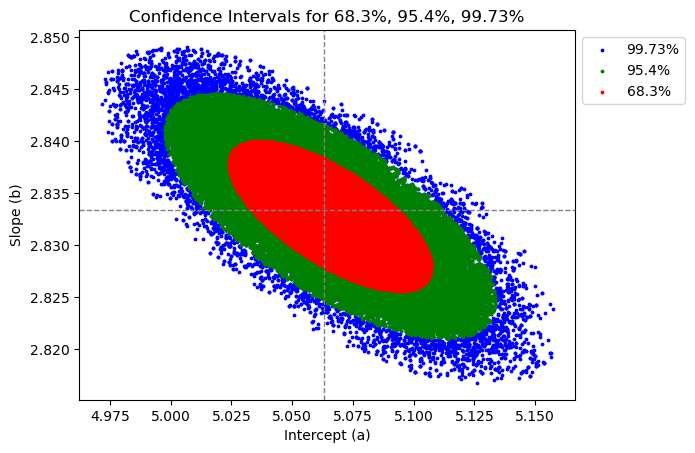

In [ ]:
#------------------(d)-------------------

#since plotting contours confidence intervals requires a grid of values and since nmcmc is huge 
#we avoid another looping over nmcmc x nmcmc points and use the relation between chi square and log likelihood
#we define cons to be the constant term in the log likelihood function

cons = -((n/2)*np.log(2*np.pi)) - (n*np.log(np.sqrt(sig_sq_1)))
#we subtract the constant term from the log likelihood values to get negative 1/2 chi square values
# we multiply by -2 to get the chi square values
#we do the same for the maximum log likelihood value which gives the minimum chi square value
#subtracting these two gives us the delta chi square values
delta_chi_mcmc = (-2)*(logL_mc - (cons)) - (-2)*(np.max(logL_mc) - (cons))


#find the credible intervals for a and b using the delta chi square values
#condition inside the brackets returns true for index where delta chi square value is less than or equal to 2.3, 6.17 and 11.8
#we use the condition to filter the a and b values from the mcmc samples
a_cred1 = samples[:,0][delta_chi_mcmc<=2.3]
b_cred1 = samples[:,1][delta_chi_mcmc<=2.3]
a_cred2 = samples[:,0][delta_chi_mcmc<=6.17]
b_cred2 = samples[:,1][delta_chi_mcmc<=6.17]
a_cred3 = samples[:,0][delta_chi_mcmc<=11.8]
b_cred3 = samples[:,1][delta_chi_mcmc<=11.8]

#using scatter plot and different colors for the different confidence intervals we can visualize the credible intervals
#here s=3 is the size of the marker
plt.scatter(a_cred3,b_cred3, marker='o', color='b', s=3,label='99.73%')
plt.scatter(a_cred2,b_cred2, marker='o', color='g', s=3,label='95.4%')
plt.scatter(a_cred1,b_cred1, marker='o', color='r', s=3,label='68.3%')

# Labels and title of the plot are mentioned
plt.xlabel('Intercept (a)')
plt.ylabel('Slope (b)')
plt.title('Confidence Intervals for 68.3%, 95.4%, 99.73%')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) #places a legend with given label values by default

#axhline plots a horizontal line at given y value
plt.axhline(b_mcmc_mean, color='grey',linestyle='--',linewidth=1)
#axvline plots a horizontal line at given x value
plt.axvline(a_mcmc_mean, color='grey',linestyle='--',linewidth=1)
#we show that the central values also correspond to the minimum chisquare

#shows the plot
plt.show()

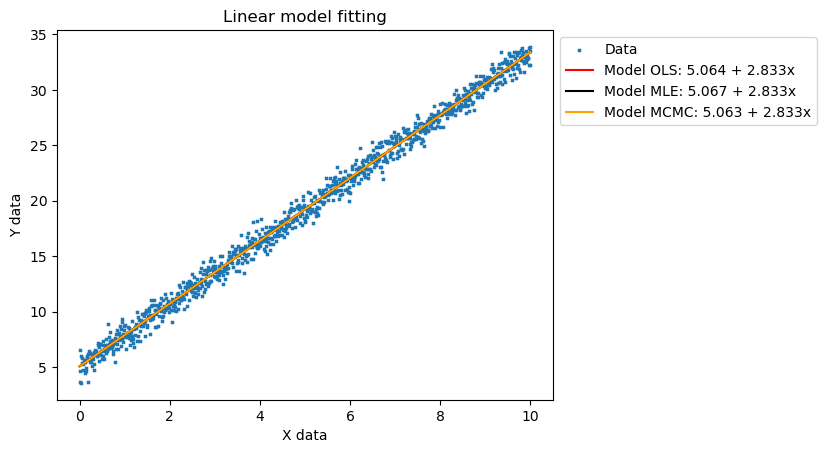

In [47]:
#-------ADDITIONAL PLOTS------
#creates a list of the model generated y-values using list comprehension (simpler for loop to create list) for plotting the data 
y_data_ols = [a + b * x[i] for i in range(0,n,1)]
y_data_mle = [a0 + b0 * x[i] for i in range(0,n,1)]
y_data_mcmc = [a_mcmc_mean + b_mcmc_mean*x[i] for i in range(0,n,1)]
#we use pyplot from matplotlib to plot and define the axes, labels and legend for the graph

#plt.plot plots x_data against y_data as a scatter plot with 'x' and size s=4and the linear model given as a straight line
plt.scatter(x, y,marker='x',label='Data',s=4) 
plt.plot(x, y_data_ols,label=f'Model OLS: {round(a,3)} + {round(b,3)}x',color='red') 
plt.plot(x, y_data_mle,label=f'Model MLE: {round(a0,3)} + {round(b0,3)}x',color='black')
plt.plot(x, y_data_mcmc,label=f'Model MCMC: {round(a_mcmc_mean,3)} + {round(b_mcmc_mean,3)}x',color='orange')
#plots the model generated y-values against x values

plt.title("Linear model fitting") #defines the title of the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) #places a legend with given label values by default
plt.xlabel('X data')
plt.ylabel('Y data')

#in the above lines we have labelled the axis
# plt.savefig("Graph2.jpg")
#this saves the graph into a file named Graph1.jpg in the working directory
plt.show()
#shows the various parameters as set using plt(pyplot)

### Step 2.1 : Metropolis for quadratic

In [ ]:
#-----------PART 2------------
#Load the quadratic data from the text file using np.loadtxt function
#replace 'filename2.txt' with the actual filename
data2 = np.loadtxt('3036943_MDC2.txt') 
#data[i,j] returns ith row and jth column. putting ':' in the first index returns all rows for a given column. 
#it is equivalent to 0:len(data) (all indices from 0 to len(data) in steps of 1) for the first index
#x data is a list of all the first column values
#y data is a list of all the second column values
x2 = data2[:,0]
y2 = data2[:,1]
#store the number of data points in n2
n2=len(x2)


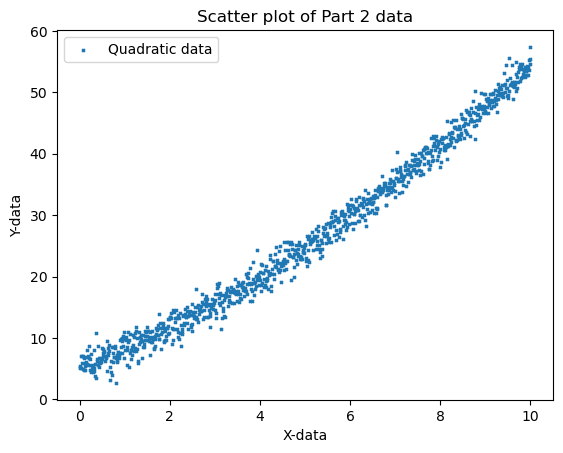

In [49]:
#Plot to visualize the the given data
#the scatter plot plots markers on (x,y) with x and y values from the data as a 'x' on the graph with size s = 4
plt.scatter(x2,y2,marker='x',label='Quadratic data',s=4)
plt.xlabel('X-data') #specifies x-label
plt.ylabel('Y-data') #specifies y-label
plt.title('Scatter plot of Part 2 data') #specifies title
plt.legend() #generates the legend from given labels
# plt.savefig('MDC_data2.jpg') #saves figure into a file
plt.show() #generates plot

In [50]:
 #creates an array of zeros with the same length as the data

#guess a and b from previously calculated values of min chi square (step 1.2) the values are a_mcmc_mean and b_mcmc_mean
#we define a reasonable initial guess for c as a list of 20 equally spaced values between 0 and 1
a_est = a_mcmc_mean
b_est = b_mcmc_mean
c_list = np.linspace(0,1,20) #reasonable initial guess for c

In [51]:
#we will calculate the variance of the residuals for each value of c in c_list and select the one with minimum variance
#make an empty array that will store residual values e[i]=y[i]-(a+b*x[i]+c*x[i]**2)
res=np.zeros(len(c_list)) #creates an array of zeros with the same length as the c_list
sum_res_sq=np.zeros(len(c_list)) #creates an array of zeros with the same length as the c_list
for j in range(0,len(c_list),1):
    for i in range(0,n2,1):
        res[j] = y2[i] - (a + (b*x2[i]) + (c_list[j]*x2[i]**2)) #calculates residual value for each data point
        sum_res_sq[j] = sum_res_sq[j] + res[j]**2 #adds the squared residual value each iteration

sig_sq_2 = np.min(sum_res_sq)/(n-3)
#we divide the sum of residual squares by n-2 to estimate variance(3 dof for 3 parameters used)


In [52]:
#------------PRINTING RESULTS--------------
print(f"The value of sigma squared for the second data is {sig_sq_2}")

The value of sigma squared for the second data is 2.0335342615512113


In [53]:
for j in range(0,len(c_list),1):
    #if the sum of residual squares for given c_list[j] is equal to the minimum sum of residual squares
    #then we set c_est to the value of c_list[j]
    if sum_res_sq[j] == np.min(sum_res_sq):
        c_est = c_list[j]
        break



In [54]:
#------------Definitions for MCMC--------
#define log likelihood for the x-y data for a given value of a,b,c and residual noise
#this calculates the likelihood for the qudratic function with three parameters

def log_likelihood3(x,y,a,b,c,sig_sq):
    #define c to be the constant term in the log likelihood function
    n=len(x)
    cons = -((n/2)*np.log(2*np.pi)) - (n*np.log(np.sqrt(sig_sq)))
    l = 0
    #iterate the loop through the data points k from 0 to n in steps of 1
    #we calculate the residual square divided by 2 times sigma square for each data point k of x and y and add to l in each iteration
    for k in range(0,n,1):
        ymodel = a + (b*x[k]) + (c*x[k]**2)
        res = y[k] - ymodel
        l = l + (-(res**2) / (2*sig_sq))
    #define log likelihood as the sum of constant term and summation term
    l = l + cons
    return l

Acceptance rate: 0.45143333333333335
[[5.05744939 2.82950606 0.21449088]
 [5.05348911 2.83204968 0.21364766]
 [5.05348911 2.83204968 0.21364766]
 ...
 [5.08699917 2.82936838 0.21529486]
 [5.106254   2.82900319 0.21461089]
 [5.106254   2.82900319 0.21461089]]


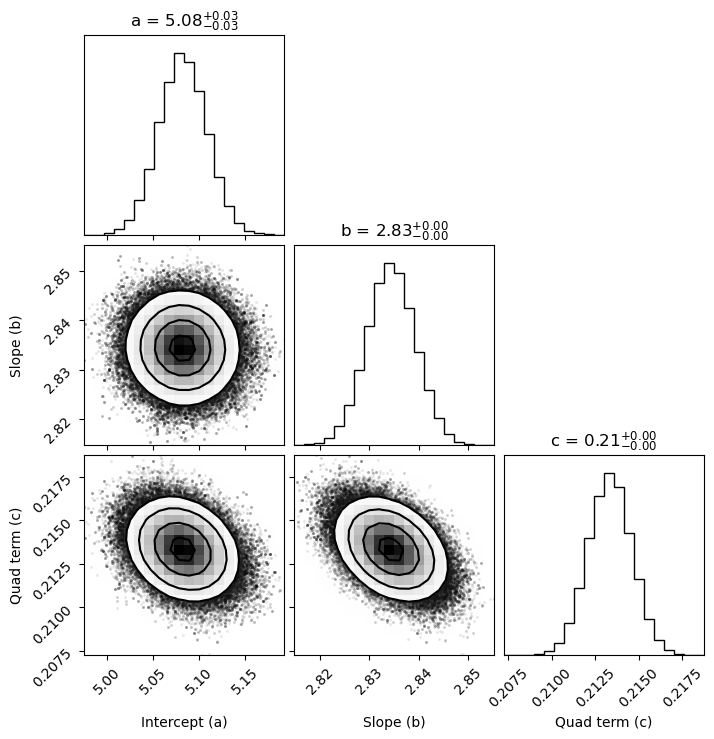

In [56]:
#------------MCMC Quadratic Setup----------
#number of steps for the metropolis algorithm
nmcmc2 = 300000
#3d array to initialise first a,b and store sampled a,b,c values as first,second and third column in each step (each row)
#rows = no. of mc chains and columns = no. of parameters
samples2 = np.zeros((nmcmc2,3))

#initalise log_likelihood array as zeros of the size of the chain of MCMC
logL_mc2 = np.zeros(nmcmc2)
accept=0
#start with accept token as 0

#initiating starting values for a and b as 5 sigmas away from the min chi square values we obtained (a0,b0)
#the first column of samples2 (samples2[:,0]) stores the values of a,the second column(samples2[:,1]) stores the values of b and third column (samples2[:2]) stores the c values
#store it in first row of samples2 for each column as a and b
#these values can be taken at random and they will still converge as we have defined normal priors
#+/- 5 sigma captures the random walk of the MCMC as well as the convergence both really well

samples2[0,0] = a_mcmc_mean-(5*a_mcmc_std)
samples2[0,1] = b_mcmc_mean-(5*b_mcmc_std)
#reasonable initial guess for c given it is uniform and we observed lowest chi-square value at 0.2
samples2[0,2] = 0.4


#calculating the log likelihood for the first step using the log_likelihood function defined earlier
#since the posterior is proportional to the likelihood times the GAprior, in log we add the log_priors of two parameters to the log likelihood
#GAprior(samples2[0,0],a0,var_a) calculates the log of probability of parameter value samples2[0,0] given the mean a0 and variance var_a
#GAprior(samples2[0,0],b0,var_b) calculates the log of probability of parameter value samples2[0,0] given the mean b0 and variance var_b
#for c we choose a uniform prior using UNprior[c,0,1] between 0 and 1 as we do not have any prior information about it from experience.
#it will return 0 for values between 0 and 1 and -inf for values outside this range forcing c to fall in the range
logL_mc2[0] = log_likelihood3(x2,y2,samples2[0,0],samples2[0,1],samples2[0,2],sig_sq_2) + GAprior(samples2[0,0],a_mcmc_mean,a_mcmc_std**2) + GAprior(samples2[0,1],b_mcmc_mean,b_mcmc_std**2) + UNprior(samples2[0,2],0,1)

#step sizes for a,b,c (these were fixed as being in the same order as the standard deviations of a and b and after some trials)
step_a = 0.01
step_b = 0.002  
step_c = 0.002

#--------------MCMC metropolis implementation----------------
#we iterate through the MCMC chain starting from 1(0 is initialised already) till end of chain (nmcmc2)
for i in range(1,nmcmc2,1):
    print(f"Point {str(i+1)} of {str(nmcmc2)}", end="\r")
    #generate a trial value for a by adding a step times a random normal value to the previous value
    #nprd.randn() generates a random normal value with mean 0 and standard deviation 1
    #we get a positive/negative change of a,b values that are mostly smaller than step size of a
    a_trial = samples2[i-1,0] + step_a*nprd.randn() 
    b_trial = samples2[i-1,1] + step_b*nprd.randn()
    c_trial = samples2[i-1,2] + step_c*nprd.randn()


    #calculate the log likelihood for the trial values of a and b
    #here we add the log of gaussian prior again at the trial values of a and b
    #if the trial value is far away then prior will be very small and the log of prior will be very negative, leading to values that are mostly rejected
    #if the trial value is close to the mean then prior will be large and the log of prior will be less negative, leading to values that are mostly accepted
    #this means the prior is acting as a penalty for values that are far away from the mean
    #the uniform prior for c is also added. It is 0 for values between 0 and 1 and -inf for values outside this range forcing c to fall in the range
    logL_trial = log_likelihood3(x2,y2,a_trial,b_trial,c_trial,sig_sq_2) + GAprior(a_trial,a_mcmc_mean,a_mcmc_std**2) + GAprior(b_trial,b_mcmc_mean,b_mcmc_std**2) + UNprior(c_trial,0,1)
    
    
    #GAprior(a_trial,a_mcmc_mean,a_mcmc_std) and GAprior(b_trial,b_mcmc_mean,b_mcmc_std) calculates the log of probability of trial value given the nomral prior around linear MCMC mean and std dev.
    #for c we choose a uniform prior using UNprior[c_trial,0,1] between 0 and 1 as we do not have any prior information about it from experience.
    #it will return 0 for values between 0 and 1 and -inf for values outside this range forcing c to fall in the range
    
    #calculate the log(likelihood ratio) as the difference between log likelihood of trial and previous values
    logL_ratio = logL_trial - logL_mc2[i-1]
    #if the log likelihood ratio is less than 0 (posterior of given trial is lesser than previous values)
    #then we accept the trial values using the metropolis algorithm and compare likelihood ratio with a random number
    #if the log likelihood ratio is greater than 0, accept the trial values
    if logL_ratio >= 0:
        #update columns in samples array with accepted a and b and c trial values
        #store the trial values in samples2 as the ith row
        samples2[i,0] = a_trial
        samples2[i,1] = b_trial
        samples2[i,2] = c_trial
        #store the log likelihood for the trial values
        logL_mc2[i] = logL_trial
        accept = accept + 1 #increment the acceptance count
    else:
        #generate a random number between 0 and 1 using nprd.rand()
        test = nprd.rand()
        #if the log likelihood ratio is less than 0, accept the trial values with a probability of exp(logL_ratio)
        if test < np.exp(logL_ratio):
            #update columns in samples array with accepted a and b and c trial values
            #store the trial values in samples2 as the ith row
            samples2[i,0] = a_trial
            samples2[i,1] = b_trial
            samples2[i,2] = c_trial
            #store the log likelihood for the trial values
            logL_mc2[i] = logL_trial
            accept = accept + 1 #increment the acceptance count
        else:
            #update columns in samples array with previous values
            #store the previous values in samples2 as the ith row
            samples2[i,0] = samples2[i-1,0]
            samples2[i,1] = samples2[i-1,1]
            samples2[i,2] = samples2[i-1,2]
            #store the log likelihood for the previous values
            logL_mc2[i] = logL_mc2[i-1]
            #no increment to accept as we rejected the value
    
acceptance_rate = accept/nmcmc2 #calculate the acceptance rate
burn_in = 5000
samples2 = samples2[burn_in:] #discard the first 5000 samples2
print("Acceptance rate:",acceptance_rate) #print the acceptance rate
print(samples2)
# Plot the MCMC samples using corner plot
#the corner module uses matplotlib to plot the samples in a 2D histogram based on their counts
#the corner.corner takes the samples, labels for the axes as intercept and slope
#the show_titles=True shows the titles for each plot and the title_kwargs specifies the font size for the titles
#smooth=1.5 smooths the histogram
figure = corner.corner(samples2,labels=['Intercept (a)', 'Slope (b)', 'Quad term (c)'], titles=['a','b','c'],show_titles=True, title_kwargs={"fontsize": 12},smooth=1.5)




In [57]:
#------The calculated parameters from MCMC quadratic-----
#find the mean and standard deviation of a,b values generated using MCMC
a_mcmc2_mean = np.mean(samples2[:,0]) #mean of a values
b_mcmc2_mean = np.mean(samples2[:,1]) #mean of b values
c_mcmc2_mean = np.mean(samples2[:,2]) #mean of c values
a_mcmc2_std = np.std(samples2[:,0]) #standard deviation of a values
b_mcmc2_std = np.std(samples2[:,1]) #standard deviation of b values
c_mcmc2_std = np.std(samples2[:,2]) #standard deviation of c values
#np.cov accepts different iterations as columns and parameters as rows so we transpose the array
cov_mat_2 = np.cov(samples2.T) #covariance of a and b values


In [58]:
#------------PRINTING RESULTS------------
print(f"The mean of a is {a_mcmc2_mean} with standard deviation {a_mcmc2_std}")

print(f"The mean of b is {b_mcmc2_mean} with standard deviation {b_mcmc2_std}")

print(f"The mean of c is {c_mcmc2_mean} with standard deviation {c_mcmc2_std}")

print(f"The value that corresponds to maximum probability is the mean values {a_mcmc2_mean},{b_mcmc2_mean} and {c_mcmc2_mean}")

print(cov_mat_2)

The mean of a is 5.082185388677111 with standard deviation 0.026032668277952517
The mean of b is 2.834384508165529 with standard deviation 0.004884821061195456
The mean of c is 0.21333976683518102 with standard deviation 0.0012451629086301442
The value that corresponds to maximum probability is the mean values 5.082185388677111,2.834384508165529 and 0.21333976683518102
[[ 6.77702115e-04 -6.31996421e-06 -1.03823946e-05]
 [-6.31996421e-06  2.38615577e-05 -2.89992738e-06]
 [-1.03823946e-05 -2.89992738e-06  1.55043592e-06]]


In [59]:
#------plotting bayesian confidence intervals------
#since plotting contours confidence intervals requires a grid of values and since nmcmc is huge 
#we avoid another looping over 100000x100000 points and use the relation between chi square and log likelihood

#we define cons to be the constant term in the log likelihood function
cons = -((n/2)*np.log(2*np.pi)) - (n*np.log(np.sqrt(sig_sq_2)))

#we subtract the constant term from the log likelihood values to get negative 1/2 chi square values
# we multiply by -2 to get the chi square values
#we do the same for the maximum log likelihood value which gives the minimum chi square value
#subtracting these two gives us the delta chi square values
delta_chi_mcmc2 = (-2)*(logL_mc2 - (cons)) - (-2)*(np.max(logL_mc2) - (cons))

#find the credible intervals for a and b using the delta chi square values
#condition inside the brackets returns true for index where delta chi square value is less than or equal to 2.3, 6.17 and 11.8
#we use the condition to filter the a and b values from the mcmc samples
#note these values are the delta chisq for the confidence intervals for three dof 

a_cred1 = samples2[:,0][delta_chi_mcmc2[burn_in:]<=3.53]  
b_cred1 = samples2[:,1][delta_chi_mcmc2[burn_in:]<=3.53]
c_cred1 = samples2[:,2][delta_chi_mcmc2[burn_in:]<=3.53]
a_cred2 = samples2[:,0][delta_chi_mcmc2[burn_in:]<=8.02]
b_cred2 = samples2[:,1][delta_chi_mcmc2[burn_in:]<=8.02]
c_cred2 = samples2[:,2][delta_chi_mcmc2[burn_in:]<=8.02]
a_cred3 = samples2[:,0][delta_chi_mcmc2[burn_in:]<=14.2]
b_cred3 = samples2[:,1][delta_chi_mcmc2[burn_in:]<=14.2]
c_cred3 = samples2[:,2][delta_chi_mcmc2[burn_in:]<=14.2]


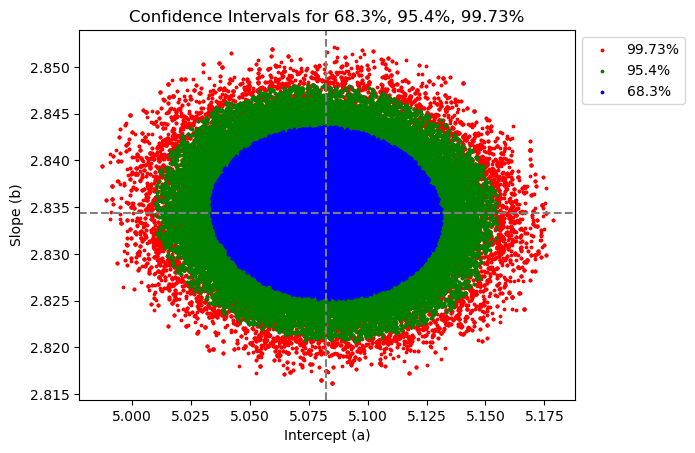

In [60]:
#we plot the credibility regions in 2D spaces (projections) for a vs b, a vs c, and b vs c

#using scatter plot and different colors for the different confidence intervals we can visualize the credible intervals
#here s=3 is the size of the marker
plt.scatter(a_cred3,b_cred3, marker='o', color='r', s=3,label='99.73%')
plt.scatter(a_cred2,b_cred2, marker='o', color='g', s=3,label='95.4%')
plt.scatter(a_cred1,b_cred1, marker='o', color='b', s=3,label='68.3%')

# Labels and title
plt.xlabel('Intercept (a)')
plt.ylabel('Slope (b)')
plt.title('Confidence Intervals for 68.3%, 95.4%, 99.73%')

#axhline plots a horizontal line at given y value
plt.axhline(b_mcmc2_mean, color='grey',linestyle='--')
#axvline plots a horizontal line at given x value
plt.axvline(a_mcmc2_mean, color='grey',linestyle='--')
#we show that the central values also correspond to the minimum chisquare

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) #places a legend with given label values by default


plt.show()

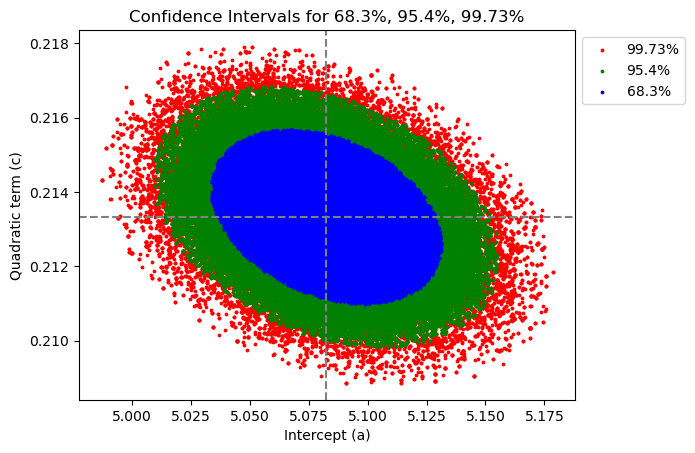

In [61]:
#-------plot a vs c---------
# Add contours for 68.3%,95.4%,99.7%

plt.scatter(a_cred3,c_cred3, marker='o', color='r', s=3,label='99.73%')
plt.scatter(a_cred2,c_cred2, marker='o', color='g', s=3,label='95.4%')
plt.scatter(a_cred1,c_cred1, marker='o', color='b', s=3,label='68.3%')

# Labels and title
plt.xlabel('Intercept (a)')
plt.ylabel('Quadratic term (c)')
plt.title('Confidence Intervals for 68.3%, 95.4%, 99.73%')

#axhline plots a horizontal line at given y value
plt.axhline(c_mcmc2_mean, color='grey',linestyle='--')
#axvline plots a horizontal line at given x value
plt.axvline(a_mcmc2_mean, color='grey',linestyle='--')
#we show that the central values also correspond to the minimum chisquare

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) #places a legend with given label values by default

plt.show()

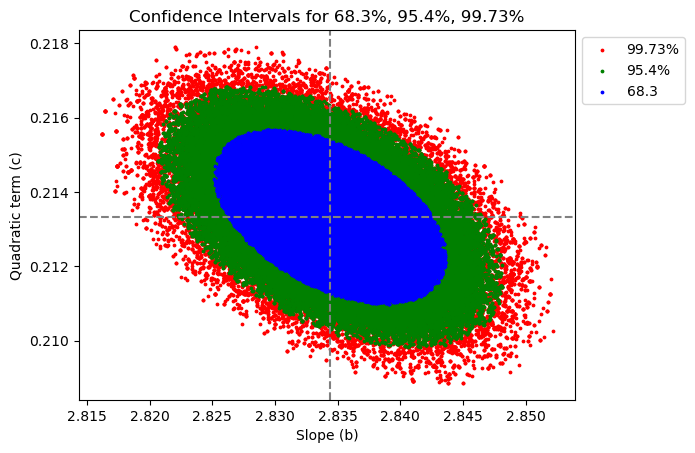

In [63]:
#-------plot b vs c---------
# Add contours for 68.3%,95.4%,99.7%

plt.scatter(b_cred3,c_cred3, marker='o', color='r', s=3,label='99.73%')
plt.scatter(b_cred2,c_cred2, marker='o', color='g', s=3,label='95.4%')
plt.scatter(b_cred1,c_cred1, marker='o', color='b', s=3,label='68.3')

# Labels and title
plt.xlabel('Slope (b)')
plt.ylabel('Quadratic term (c)')
plt.title('Confidence Intervals for 68.3%, 95.4%, 99.73%')

#axhline plots a horizontal line at given y value
plt.axhline(c_mcmc2_mean, color='grey',linestyle='--')
#axvline plots a horizontal line at given x value
plt.axvline(b_mcmc2_mean, color='grey',linestyle='--')
#we show that the central values also correspond to the minimum chisquare

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) #places a legend with given label values by default


plt.show()

### Step 2.2 : Marginal Probabilities

In [ ]:
from scipy.special import logsumexp

In [64]:
#np.linspace(amin,amax,n) generates a list of n equally spaced values between amin and amax
#for linear we take the a,b parameter space around mcmc linear mean with the corresponding standard deviation
num = 7 #number of standard deviations to consider
a_lin = np.linspace(a_mcmc_mean-(num*a_mcmc_std),a_mcmc2_mean+(num*a_mcmc_std),100)
b_lin = np.linspace(b_mcmc_mean-(num*b_mcmc_std),b_mcmc2_mean+(num*b_mcmc_std),100)

#for quadratic we take the a,b parameter space around mcmc quadratic mean with the corresponding standard deviation
a_quad = np.linspace(a_mcmc2_mean-(num*a_mcmc2_std),a_mcmc2_mean+(num*a_mcmc2_std),100)
b_quad = np.linspace(b_mcmc2_mean-(num*b_mcmc2_std),b_mcmc2_mean+(num*b_mcmc2_std),100)
c_quad = np.linspace(c_mcmc2_mean-(num*c_mcmc2_std),c_mcmc2_mean+(num*c_mcmc2_std),100)

In [65]:
#For the linear model
#define linear_lik to store the log likelihood values for each combination of a,b grid of values
#we initialise an empty array of size of the grid to store the log likelihood values
linear_lik = np.zeros((len(a_lin),len(b_lin)))
#we use a for loop to iterate through the grid of values for a and b and store the log likelihood values in l1 array
for i in range(0,len(a_lin),1):
        for j in range(0,len(b_lin),1):
                linear_lik[i,j] = log_likelihood(x2,y2,a_lin[i],b_lin[j],sig_sq_2) + GAprior(a_lin[i],a_mcmc_mean,a_mcmc_std**2) + GAprior(b_lin[j],b_mcmc_mean,b_mcmc_std**2)

#l1[i,j] returns the log likelihood value for the ith row and jth column of the grid(ith value of a and jth value of b)



In [66]:
#likelihood values of the OLS. This can also be compared although it is of a different data. The model and parameters are similar.
#define ols_lik to store the log likelihood values for each combination of a,b grid of values
#we initialise an empty array of size of the grid to store the log likelihood values
ols_lik = np.zeros((len(a_vals),len(b_vals)))
#we use a for loop to iterate through the grid of values for a and b and store the log likelihood values in l1 array
for i in range(0,len(a_vals),1):
        for j in range(0,len(b_vals),1):
                ols_lik[i,j] = log_likelihood(x,y,a_vals[i],b_vals[j],sig_sq_1) + GAprior(a_vals[i],a,var_a) + GAprior(b_vals[i],b,var_b)

#here we assume prior centered around a,b values obtained with least squares and the variances obtained from there too.
#we add the prior to the log likelihood values at each grid point 
#the prior is a uniform distribution (equal probability) for a and b in the range of a and b +/- 5 standard deviations
#l1[i,j] returns the log likelihood value for the ith row and jth column of the grid(ith value of a and jth value of b)


In [67]:
#For the quadratic model
#define quad_lik to store the log likelihood values for each combination of a,b,c grid of values
#we initialise an empty array of size of the grid to store the log likelihood values
quad_lik = np.zeros((len(a_quad),len(b_quad),len(c_quad)))
#we use a for loop to iterate through the grid of values for a and b and store the log likelihood values in l1 array
for i in range(0,len(a_quad),1):
        for j in range(0,len(b_quad),1):
                for k in range(0,len(c_quad),1):
                        quad_lik[i,j,k] = log_likelihood3(x2,y2,a_quad[i],b_quad[j],c_quad[k],sig_sq_2) + GAprior(a_quad[i],a_mcmc2_mean,a_mcmc2_std**2) + GAprior(b_quad[j],b_mcmc2_mean,b_mcmc2_std**2) + GAprior(c_quad[k],c_mcmc2_mean,c_mcmc2_std**2)

#l1[i,j] returns the log likelihood value for the ith row and jth column of the grid(ith value of a and jth value of b)



In [71]:
#logsumexp(arr) is the log of the sum of exponentials of the array of values
#we use logsumexp to avoid overflow and underflow issues when calculating the sum of exponentials

In [72]:
#sum of exponentials of the log likelihood values for the linear model using logsumexp across the grid of parameter values
#added log values of the differential element (delta a and delta b) as they contribute to the evidence
lin_evid = logsumexp(linear_lik + np.log(a_lin[1]-a_lin[0]) + np.log(b_lin[1]-b_lin[0]))
#evidence for linear model

In [73]:
#sum of exponentials of the log likelihood values for the linear model using logsumexp across the grid of parameter values
#added log values of the differential element (delta a and delta b) as they contribute to the evidence
ols_evid = logsumexp(ols_lik + np.log(a_vals[1]-a_vals[0]) + np.log(b_vals[1]-b_vals[0]))
#evidence for linear model

In [74]:
#sum of exponentials of the log likelihood values for the quadratic model using logsumexp across the grid of parameter values
#added log values of the differential element (delta a and delta b and delta c) as they contribute to the evidence
quad_evid = logsumexp(quad_lik + np.log(a_quad[1]-a_quad[0]) + np.log(b_quad[1]-b_quad[0]) + np.log(c_quad[1]-c_quad[0]))
#evidence for quadratic model

In [75]:
#the evidence ratio is the difference between the log evidence of the two models

ratio_evid = quad_evid - lin_evid
print("Evidence ratio for the two MCMCs:",ratio_evid)

ratio_evid2 = quad_evid - ols_evid
print("Evidence ratio for OLS and quadratic:",ratio_evid2)

ratio_evid3 = lin_evid - ols_evid
print("Evidence ratio for OLS and linear MCMC:",ratio_evid3)

Evidence ratio for the two MCMCs: 20900.702862139467
Evidence ratio for OLS and quadratic: -703.1421935568708
Evidence ratio for OLS and linear MCMC: -21603.845055696336


In [76]:
#the bayes factor for quad vs linear MCMC is the exponentiation of the evidence ratio1
bayesfactor=np.exp(ratio_evid)

#the bayes factor for quad vs OLS is the exponentiation of the evidence ratio2
bayesfactor2=np.exp(ratio_evid2)

#the bayes factor for linMCMC vs OLS is the exponentiation of the evidence ratio3
bayesfactor3=np.exp(ratio_evid3)

print("Bayes Factor for the lin vs quad MCMCs:",bayesfactor)
print("Bayes Factor for the OLS vs Quad MCMC:",bayesfactor2)
print("Bayes Factor for the OLS vs lin MCMC:",bayesfactor3)


Bayes Factor for the lin vs quad MCMCs: inf
Bayes Factor for the OLS vs Quad MCMC: 4.258193031590615e-306
Bayes Factor for the OLS vs lin MCMC: 0.0


/var/folders/52/fm98rkhj3qbbnw_qwwhnc99w0000gn/T/ipykernel_35746/2302906688.py:2: RuntimeWarning: overflow encountered in exp
  bayesfactor=np.exp(ratio_evid)


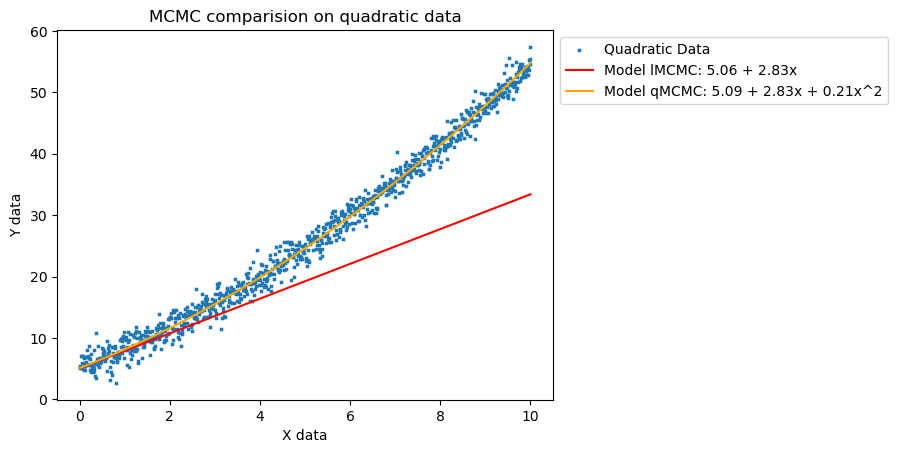

In [ ]:
# ------ ADDITIONAL COMPARISION PLOTS----
# creates a list of the model generated y-values using list comprehension for plotting the data
y2_data_3 = [a_mcmc_mean + b_mcmc_mean * x2[i] for i in range(0,n,1)]
y2_data_4 = [a_mcmc2_mean + b_mcmc2_mean * x2[i] + c_mcmc2_mean*x2[i]**2 for i in range(0,n,1)]
#we use pyplot from matplotlib to plot and define the axes, labels and legend for the graph

#plt.plot plots x_data against y_data as a scatter plot with 'x' and size s=4and the linear model given as a straight line
plt.scatter(x2, y2,marker='x',label='Quadratic Data',s=4) 
plt.plot(x2, y2_data_3,label=f'Model lMCMC: {round(a_mcmc_mean,2)} + {round(b_mcmc_mean,2)}x',color='red')
plt.plot(x2,y2_data_4,label=f'Model qMCMC: {round(a_mcmc2_mean,2)} + {round(b_mcmc2_mean,2)}x + {round(c_mcmc2_mean,2)}x^2',color='orange')

#plots the model generated y-values against x values

plt.title("MCMC comparision on quadratic data") #defines the title of the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) #places a legend with given label values by default
plt.xlabel('X data')
plt.ylabel('Y data')
#in the above lines we have labelled the axis
# plt.savefig("Graph2.jpg")
#this saves the graph into a file named Graph1.jpg in the working directory
plt.show()
#shows the various parameters as set using plt(pyplot)